<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/Intro_python_data_science_ESP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perquè Python?

Python és un llenguatge de programació d'alt nivell que permet resoldre problemes de proòpsit general. És especialment útil en aplicacions de tractament de dades, reconeixement de patrons i intel.ligència artificial. 

L'objectiu d'aquesta primera part del curs no és fer un curs de programació en Python, sinó més aviat que el feu servir com una eina que us serà molt útil en diferents situacions relacionades amb l'ànàlisi explotaròria de dades. Penseu en una mena de calculadora cientìfica molt potent. 

Python és un llenguatge organitzat en diferents llibreries que resulten útils en diferents situacions. Les més importants en l'àmbit de l'anàlisi de dades són les següents:

- Numpy: Operacions matemàtiques bàsiques amb vectors i matrius: https://numpy.org/

- Scipy: Operacions bàsiques d'estadística: https://www.scipy.org/
- Pandas: Permet manipular fitxers de dades en format excel, csv, text, etc. https://pandas.pydata.org/
- Seaborn: Representació gràfica de dades en format pandas: https://seaborn.pydata.org/
- sckit-learn: Eines de reconeixement de patrons i intel.ligència artificial https://scikit-learn.org/stable/
- sckit-image: Tractament d'imatges https://scikit-image.org/







# Entorn de programació:

Hi ha una gran quantitat d'entorns de programació que permeten desenvolupar programes amb Python. 

Entre totes les opcions, nosaltres farem servir una plataforma cloud de google anomenada google colaboratory que ja té totes les llibreries disponibles i permet treballar sense la necessitat d'instal.lar res als nostres ordinadors: 

https://colab.research.google.com/


L'únic que ens demana per començar a treballar és un compte de google. A més, ens permet executar els programes als servidors de google, el que pot ser molt útil quan manipulem grans quantitats de dades. 

La forma de programar en aquesta plataforma són els jupyter notebooks: Un notebook és un document que combina text i codi Python. El text es fa servir per explicar el que fem en cada moment, i el codi Python excuta diferents segments de codi que realitzen diferents funcions.







# A què ens referim com a dades en IA? 

![Data in AI](https://drive.google.com/open?id=15gGWl3ZveIXDPVKHt3Jx1DSDvH6dXZiD)

### Manipulació bàsica de dades amb pandas: 


Primer carreguem el fitxer al nostre google drive:

In [14]:
from google.colab import files 
import io
uploaded = files.upload()

Saving test.xlsx to test (1).xlsx


In [0]:
import pandas as pd
df = pd.read_excel('test.xlsx', index_col=0,header=2)

Ara consultem el contingut del fitxer mirant la capçelera:

In [16]:
df.head()

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10
2019-03-12,16,17
2019-03-13,19,24
2019-03-14,22,31


Consultem les dimensions del fitxer:

In [17]:
df.shape

(9, 2)

In [18]:
df['Humans']

Date
2019-03-10    10
2019-03-11    13
2019-03-12    16
2019-03-13    19
2019-03-14    22
2019-03-15    25
2019-03-16    28
2019-03-17    31
2019-03-18    34
Name: Humans, dtype: int64

Busquem les dades en un cert intèrval de temps:

In [19]:
import datetime 
df.loc[datetime.date(year=2019,month=1,day=1):datetime.date(year=2019,month=3,day=11)]


,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10


Podem buscar les dades que compleixen una certa condició:


In [20]:
df.loc[df['Humans']>6]

,Humans,Robots
Date,,
2019-03-10,10,3
2019-03-11,13,10
2019-03-12,16,17
2019-03-13,19,24
2019-03-14,22,31
2019-03-15,25,38
2019-03-16,28,45
2019-03-17,31,52
2019-03-18,34,59


I fer cerca combinada de diferents restriccions:

In [21]:
df.loc[(df['Humans']>6) & (df['Robots']>20)]

,Humans,Robots
Date,,
2019-03-13,19,24
2019-03-14,22,31
2019-03-15,25,38
2019-03-16,28,45
2019-03-17,31,52
2019-03-18,34,59


Podem accedir als fitxers que tinguem emmagatzemats al nostre google drive. Per poder-hi accedir s'ha de muntar la unitat google drive en xarxa. Ens demanarà que posem un codi de verificació dels permisos d'accès. 

In [46]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Ara mirem algun tipus de dades més interessants: El Titanic dataset:

https://www.kaggle.com/c/titanic



In [47]:
df1 = pd.read_csv('/content/gdrive/My Drive/data_course/titanic/train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

El primer que podem fer és consultar una taula estadística descriptiva de les dades:

In [119]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cada fila correspon a un passatger, i les columnes són els seus atributs (si van sobreviure, en quina classe anàven, etc). 



Podem mirar quina fracció tenim de supervivents del total de passatgers de la base de dades:

In [53]:
N = df1.shape[0]
Nvius = df1.loc[df1['Survived']==1].shape[0]
Nmorts = df1.loc[df1['Survived']==0].shape[0]
print('Hi ha un total de {} passatgers, dels quals {} van sobreviure i {} van morir'.format(N,Nvius,Nmorts))

Hi ha un total de 891 passatgers, dels quals 342 van sobreviure i 549 van morir


Podem calcular els valors promig dels atributs en funció de si són o no supervivents:

In [59]:
df1_agrupats = df1.groupby(by=['Survived'])
df1_agrupats.mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Per exemple, veiem que els supervivents són, en promig, més joves i a més anaven en camarots de classe superior. De fet la variable Fare (el que van pagar pel passatge) és clarament superior en els supervivents.

Podem respondre a preguntes com ara: quin és el passatger més jove i el més gran del conjunt de dades? 

In [70]:
df1.sort_values(by=['Age'],ascending=False)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Veiem que desconeixem l'edat d'algun dels passatgers. En concret, en tenim un total de 177 passatgers dels que desconeixem la seva edat:


In [80]:
df1.loc[df1['Age'].isna()==True].shape[0]

177

Hi ha diferents estratègies per tractar les dades desconegudes:

La primera seria eliminar els passatgers dels que no tenim la seva edat:


In [81]:
df1_ambedats = df1['Age'].dropna()
df1_ambedats.shape

(714,)

La segona forma de procedir seria substituir la seva edat per un valor constant, per exemple per la mitja d'edats de la resta de passatgers:

In [82]:
df1_fillmean = df1.fillna(df1.mean())
df1_fillmean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


La tercera, i potser la més intel.ligent, seria la de imputar una edat en funció de la edat que tinguin passatgers amb propietats numèriques similars. Per això haurem de fer servir les llibreries de intel.ligència artificial sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

Primer definim un dataframe que només contingui els atributs numèrics:


In [87]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [90]:
df1_num = df1.select_dtypes(include='number')
df1_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [97]:
df1_num.loc[df1_num['Age'].isna()==True]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
5,6,0,3,NaN,0,0,8.4583
17,18,1,2,NaN,0,0,13.0000
19,20,1,3,NaN,0,0,7.2250
26,27,0,3,NaN,0,0,7.2250
28,29,1,3,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,860,0,3,NaN,0,0,7.2292
863,864,0,3,NaN,8,2,69.5500
868,869,0,3,NaN,0,0,9.5000
878,879,0,3,NaN,0,0,7.8958


In [102]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputed_data = imputer.fit_transform(df1_num)

df1_imputed = pd.DataFrame(imputed_data,columns=df1_num.columns)
df1_imputed.loc[df1_num['Age'].isna()==True]

ERROR! Session/line number was not unique in database. History logging moved to new session 59


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
5,6.0,0.0,3.0,30.5,0.0,0.0,8.4583
17,18.0,1.0,2.0,44.5,0.0,0.0,13.0000
19,20.0,1.0,3.0,14.5,0.0,0.0,7.2250
26,27.0,0.0,3.0,24.5,0.0,0.0,7.2250
28,29.0,1.0,3.0,40.5,0.0,0.0,7.8792
...,...,...,...,...,...,...,...
859,860.0,0.0,3.0,19.5,0.0,0.0,7.2292
863,864.0,0.0,3.0,39.0,8.0,2.0,69.5500
868,869.0,0.0,3.0,15.0,0.0,0.0,9.5000
878,879.0,0.0,3.0,19.5,0.0,0.0,7.8958


Comentari: També podem accecir a aquest dataset i a molts altres de prova mitjançant algunes de les llibreries de Python per fer tractacment de dades. En aquest cas, per exemple, a partir de les llibreries de representació gràfica seaborn https://seaborn.pydata.org/

In [72]:
import seaborn as sns
dtitanic = sns.load_dataset('titanic')
dtitanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Exercici 1: Carregueu les dades mpg cars de la web de Kaggle datasets:

https://www.kaggle.com/uciml/autompg-dataset

El conjunt de dades conté 9 atributs d'un total de 398 cotxes. Alguns atributs són numèrics, d'atres són categòrics. 

1. mpg: miles per gallon: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete (1:USA, 2:Europe, 3: Japan)
8. origin: multi-valued discrete
9. car name: string (unique for each instance)


Respongui a les següents qüestions:

  a) Quin és el rang d'anys dels cotxes inclosos a les dades? 

  b) Quants cotxes hi ha que siguin de l'any 74?

  c) Quina és el pes mig i el mpg promig dels cotxes de l'any 70? I dels de l'any 80? Observa alguna tendència en l'evolució d'aquestes dues magituds a mesura que incrementa l'any del model?

In [109]:
df2 = pd.read_csv('/content/gdrive/My Drive/data_course/mpg_cars/auto-mpg.csv')
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


El primer que podem fer és substituir els valors numèrics de la columna origin per les paraules que descriuen l'origen del cotxe:

In [144]:
df2['origin'] = df2.origin.replace([1,2,3],['USA','Europe','Japan'])
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,USA,ford torino


In [145]:
df2.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

Els models van de l'any 70 a l'any 82:

In [146]:
df2.sort_values(by=['model year'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,USA,chevrolet chevelle malibu
28,9.0,8,304.0,193,4732,18.5,70,USA,hi 1200d
27,11.0,8,318.0,210,4382,13.5,70,USA,dodge d200
26,10.0,8,307.0,200,4376,15.0,70,USA,chevy c20
25,10.0,8,360.0,215,4615,14.0,70,USA,ford f250
...,...,...,...,...,...,...,...,...,...
368,27.0,4,112.0,88,2640,18.6,82,USA,chevrolet cavalier wagon
367,28.0,4,112.0,88,2605,19.6,82,USA,chevrolet cavalier
396,28.0,4,120.0,79,2625,18.6,82,USA,ford ranger
381,36.0,4,107.0,75,2205,14.5,82,Japan,honda accord


També ho podem fer amb:

In [147]:
df2.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


df2.describe

In [148]:
N70 = df2.loc[df2['model year']==70].shape[0]

print('Hi ha un total de {} cotxes del 70'.format(N70))

Hi ha un total de 29 cotxes del 70


A continuació podem mirar l'evolució de les diferents característiques en funció de l'any del model:

In [149]:
df2.groupby(by=['model year']).mean()


,mpg,cylinders,displacement,weight,acceleration
model year,,,,,
70,17.689655,6.758621,281.413793,3372.793103,12.948276
71,21.250000,5.571429,209.750000,2995.428571,15.142857
72,18.714286,5.821429,218.375000,3237.714286,15.125000
73,17.100000,6.375000,256.875000,3419.025000,14.312500
74,22.703704,5.259259,171.740741,2877.925926,16.203704
75,20.266667,5.600000,205.533333,3176.800000,16.050000
76,21.573529,5.647059,197.794118,3078.735294,15.941176
77,23.375000,5.464286,191.392857,2997.357143,15.435714
78,24.061111,5.361111,177.805556,2861.805556,15.805556


El pes i mpg promig dels cotxes de l'any 70 és de (3372,17.68) i el dels de l'any 80 de (2436,33) respectivament. Resulta evident que amb els temps els cotxes són més eficients (major mpg) i més lleugers (menys pes). Això es pot veure amb la evolució d'aquestes dues variables al llarg dels anys. 

# Representació gràfica de dades: 

Arribat aquest punt, necessitem començar a fer gràfics per representar diferents aspectes del que veiem a les dades. Per fer gràfics de dades en format dataframe de pandas, la millor opció és fer servir les llibreries seaborn:

https://seaborn.pydata.org/

En l'exercici anterior, voliem representar la evolució de les variables mpg i pes en funció de l'any del model. 


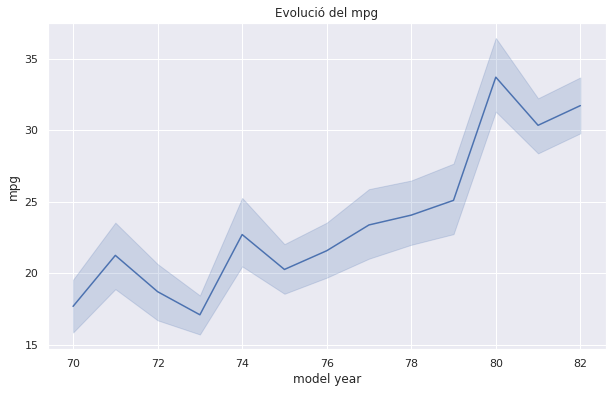

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
plt.show()

Podem fer una figura amb dos panells, el superior representant el mpg i l'inferior representant l'evolució del pes:

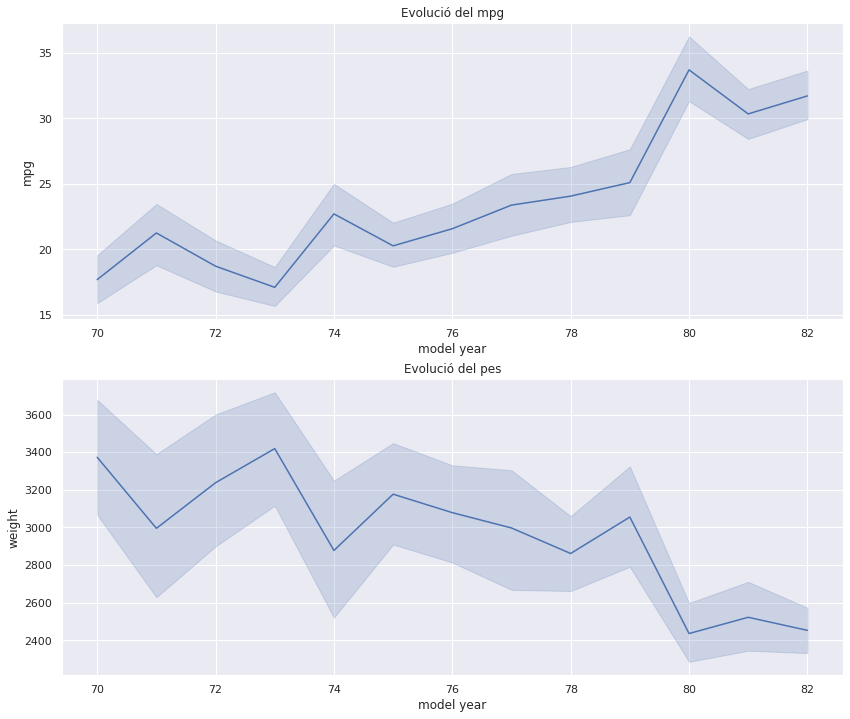

In [154]:

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(211)
ax = sns.lineplot(x="model year", y="mpg", data=df2)
ax.set_title('Evolució del mpg')
ax1 = fig.add_subplot(212)
ax1 = sns.lineplot(x="model year", y="weight", data=df2)
ax1.set_title('Evolució del pes')
plt.show()

També podem mirar com evoluciona el mpg en funció del seu origen:


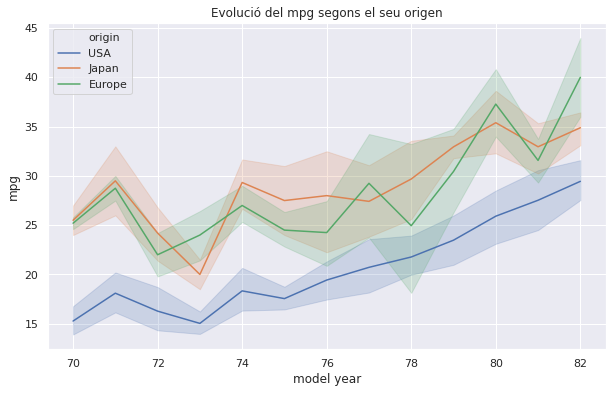

In [155]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x="model year", y="mpg",hue='origin',data=df2)
ax.set_title('Evolució del mpg segons el seu origen')
plt.show()

Hi ha molta correlació entre pes i eficiència? Mirem-ho:

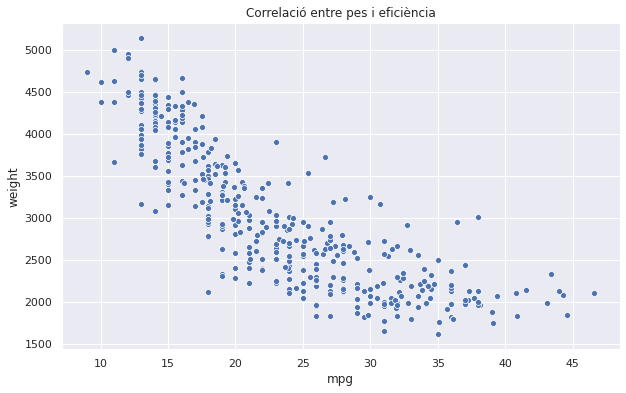

In [156]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="mpg", y="weight", data=df2)
ax.set_title('Correlació entre pes i eficiència')
plt.show()

Podem fer un model lineal del comportament 

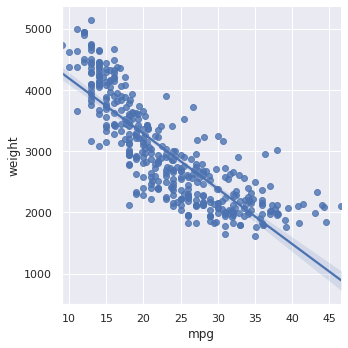

In [164]:
ax = sns.lmplot(x="mpg", y="weight", data=df2)


Tenint en compte l'origen, la relació entre pes i mpg pot ser diferent:


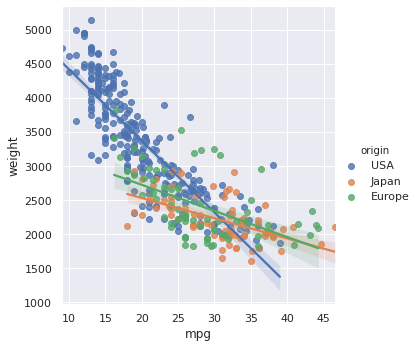

In [166]:
ax = sns.lmplot(x="mpg", y="weight", hue='origin',data=df2)


De fet observem que els cotxes d'origen europeu i japonès solen tenir menor pes i una major eficiència. 

I si volem representar l'acceleració en funció del nombre de cilindres? Hi ha moltes opcions:

Un scatterplot no sembla la millor de les opcions, perquè la variable cylinders pren valors discrets:

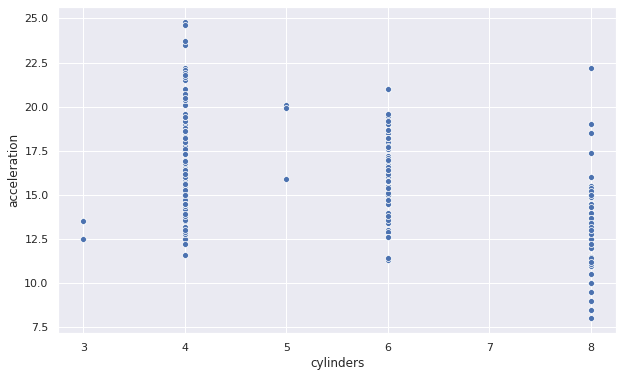

In [168]:
fig = plt.figure(figsize=(10,6))
ax = sns.scatterplot(x="cylinders", y="acceleration", data=df2)
plt.show()

Potser millor un barplot:

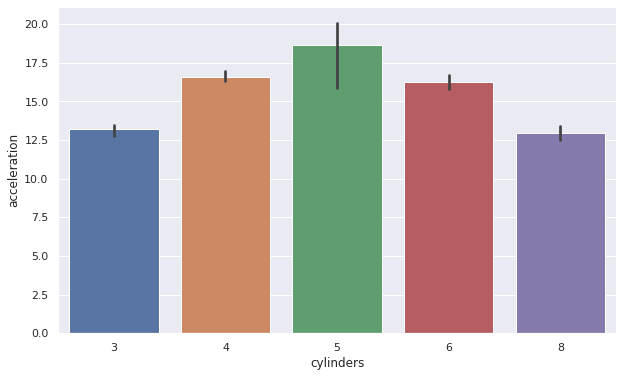

In [169]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", data=df2)
plt.show()

I en funció del seu orígen veiem que els cotxes amb només 3 cilindres són Japonesos i els de 8 són tots dels USA.

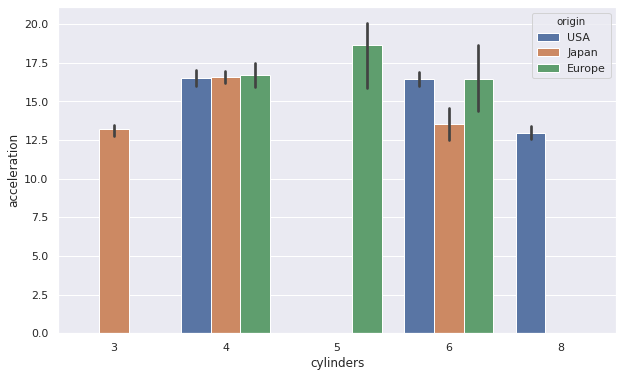

In [171]:
fig = plt.figure(figsize=(10,6))
ax = sns.barplot(x="cylinders", y="acceleration", hue='origin',data=df2)
plt.show()

# Histogrames: 

Probabilitat d'observar un determinat rang de valors en la distribució d'una variable:

Quina és la distribució de la variable weight?

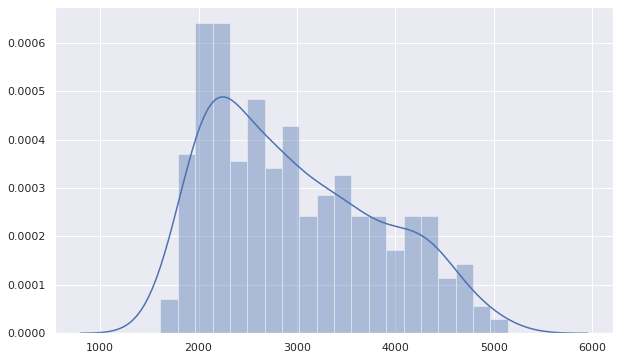

In [174]:
fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)

Si queremos marcar la posición del valor medio y de la mediana de la distribución


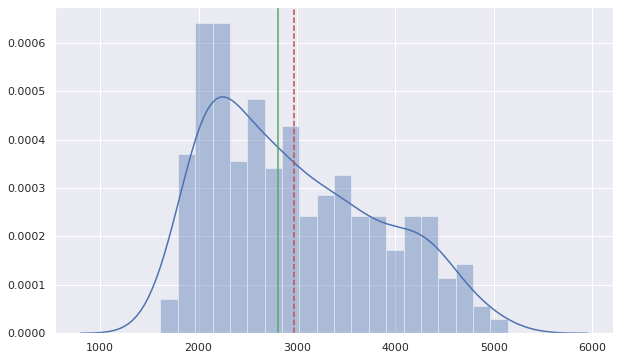

In [186]:
media_weight = df2['weight'].mean()
mediana_weight = df2['weight'].median()

fig = plt.figure(figsize=(10,6))
ax=sns.distplot(df2["weight"].values,bins=20)
plt.axvline(media_weight, color="r", linestyle="--");
plt.axvline(mediana_weight, color="g", linestyle="-");

Com seria la distribució conjunta de les variables weight i acceleration? 


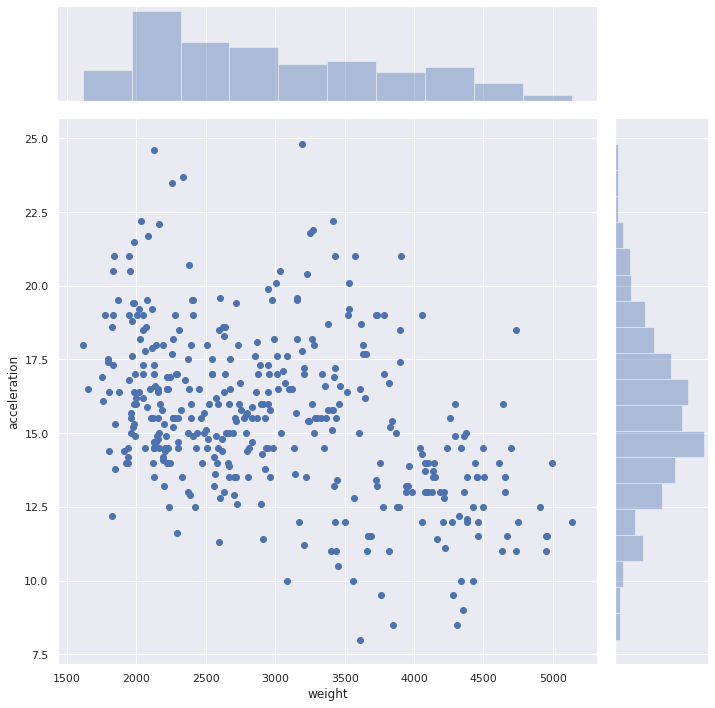

In [179]:
ax = sns.jointplot(x='weight',y='acceleration',data=df2,height=10)

Per últim, podem fer una representació de totes les variables de forma simultània

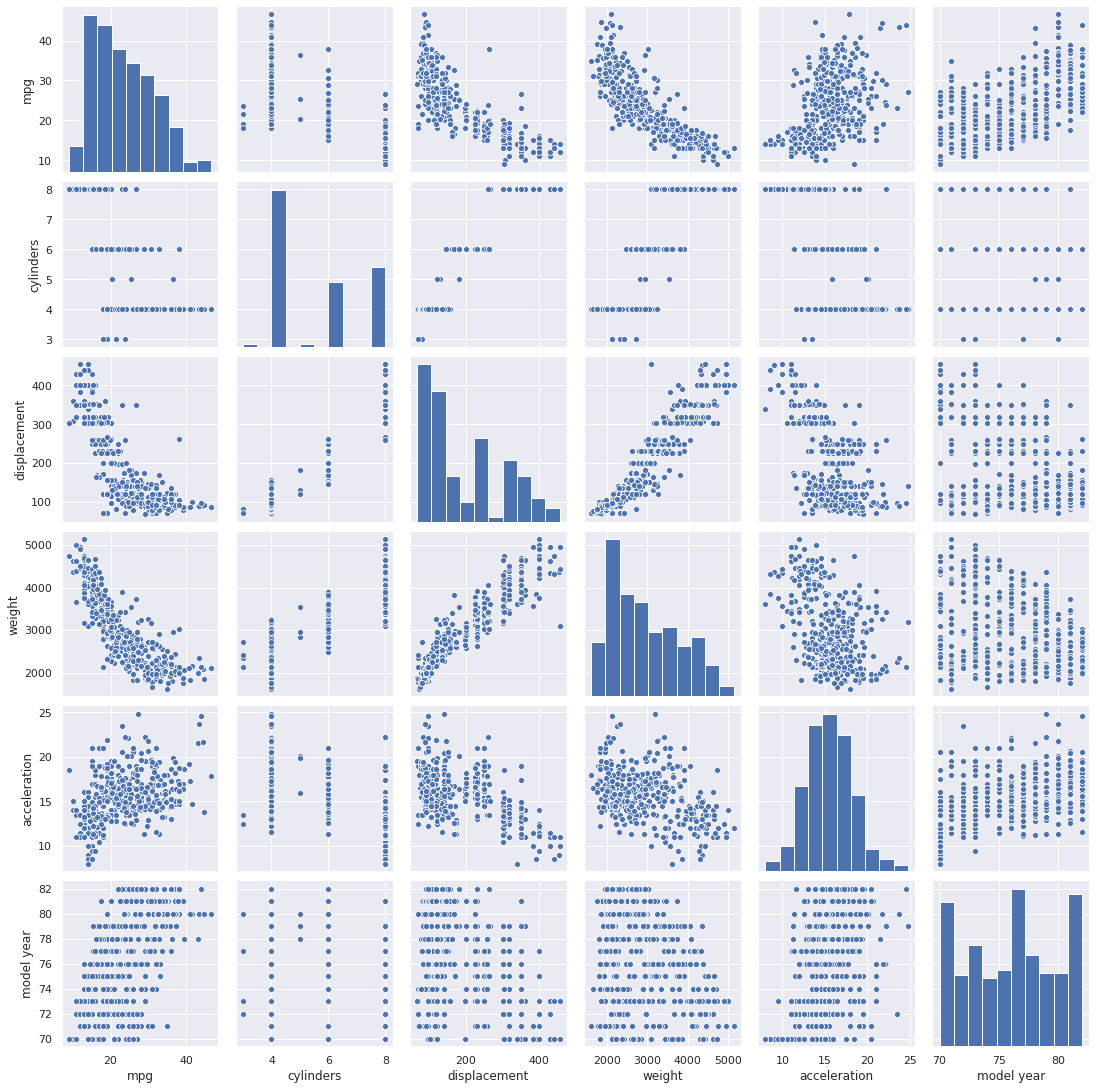

In [187]:
sns.pairplot(df2)
plt.show()

I la mateixa representació però indicant amb colors diferents els cotxes segons el seu origen

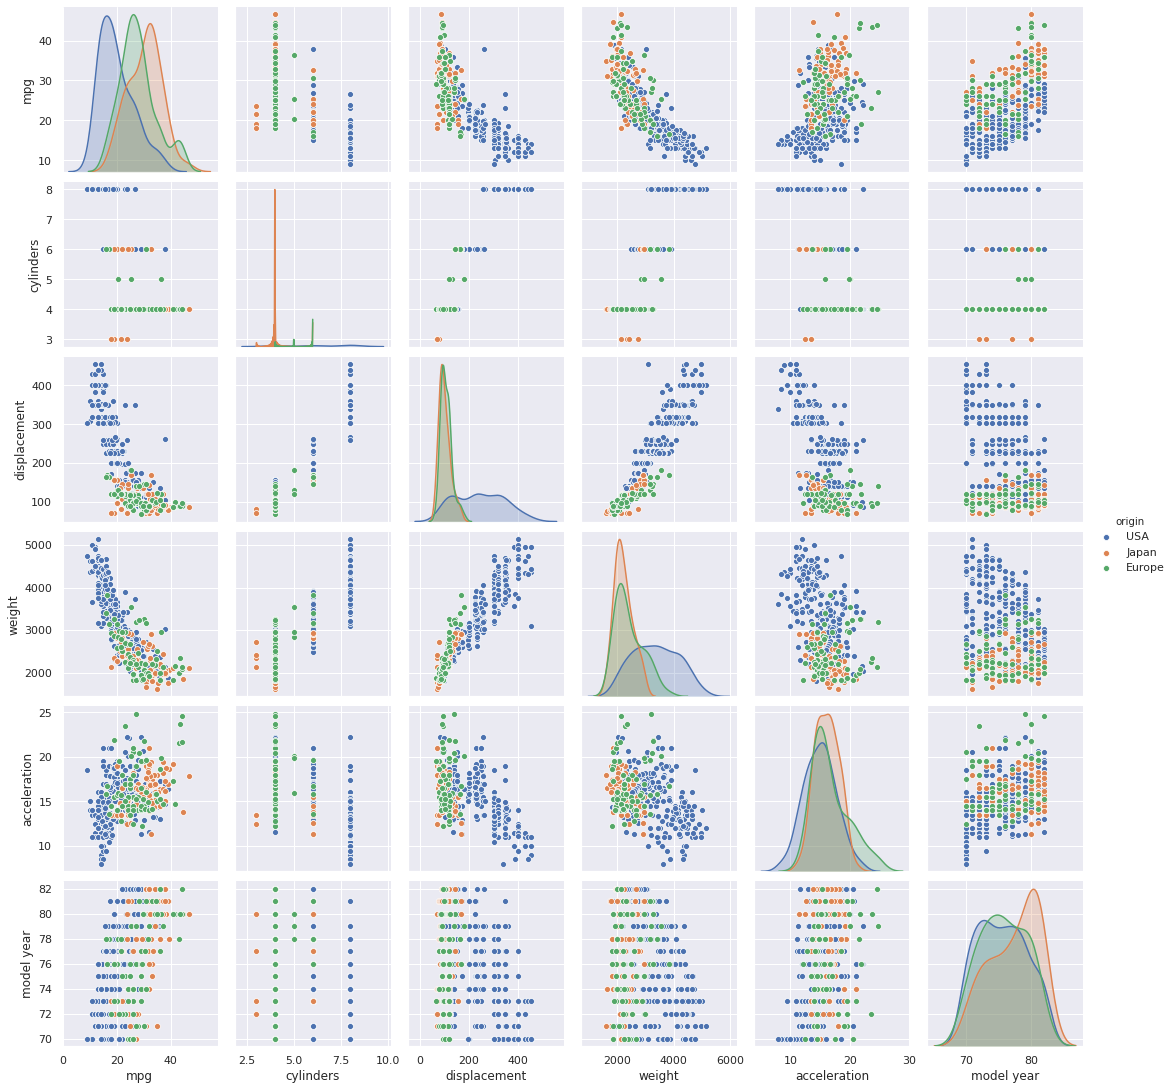

In [188]:
sns.pairplot(df2,hue="origin")


# Exercise 2: Carregueu el Boston Crime dataset

I genereu un informe en forma de jupyter notebook amb les característiques més rellevants

In [183]:
df3 = pd.read_csv('/content/gdrive/My Drive/data_course/boston_crime/crime.csv', engine='python')
df3.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [184]:
df3.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,327820.000000,327820.000000,327820.000000,327820.000000,307188.000000,307188.000000
mean,2317.961171,2016.598676,6.672213,13.114840,42.212995,-70.906030
std,1184.990073,1.009775,3.253984,6.292714,2.173496,3.515832
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297466,-71.097081
50%,2907.000000,2017.000000,7.000000,14.000000,42.325552,-71.077493
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062482
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000
